# Predictive Sentiment
## Technical Notebook
##### By Zamena Jaffer

## Executive Summary

In this notebook I will summarise the analysis and findings of this project, walking through my approach to the data set, modelling and recommendations based of what I found - as well as next steps for this project.

This project started off as an investigation around the sentiment expressed in the way article titles are written by a client where I work, and how that may impact the sharibility of that article. With the intention to develop a model that could predict the sharibility of an article title based off the different states and level of emotion hit within that piece of text and provide insights around how to write content to drive shares. 

However, upon exploring the data, I found that there was little correlation between the expression of sentiment and share rates.
However, with the use of some NLP - I managed to analyse the data and instead of build a model to predict shares, I was able to identify content topics that drive significantly high share rates, and generate some recommendations around these topcis to drive traction with the audience.

# 1. The Problem Statement
Working for a content markeing agency that handle the development and measurment of content for a range of clients, I chose to focus this project on a problem identified in the work space, to develop a solution for a client in particular that wants to find out how to drive more shares to their content.

## a. The Current State
A client has run a content hub for the last 3 years, publishing articles about the energy industry on a regular basis.
They have set benchmarks for their KPI’s and have noticed that the ‘volume of shares’ KPI has been below benchmark for a few months in a row.

## b. The Gap
The client would like produce content that drives shares to meet benchmark. 
I have noticed from an analyst stand point, article titles that express a more positive sentiment receive a higher volume of shares.
By analysing the last 3 years worth of articles along with shares and sentiment I will look for a correlation between positive sentiment and article shares.

## c. Future State
The analysis will allow for the build of a predictive model that will analyse a range of article titles with differing emotional intent before being published, to predict the volume of shares they may receive, optimizing audience engagement and aiding the decision making at the content development level.

## d. Hypothesis
There is an assumption here that articles title that express sentiment will correlate with volume of shares that article receives.

The null hypothesis for this data set is:

- Articles titles written with the expression of positive sentiment receive a high volume of shares

Therefore, the alternative hypothesis for this data set will be:

- Articles titles written without the expression of positive sentiment receive a high volume of shares

## e. Goals
The primary goal of this analysis is to prove the correlation between sentiment expressed within article titles and article shares.

Following this, the success metric for this project will be to use the model built to predict the number of shares an article will receive based on the language used to write the title, with a statistical significance of 5% or less (p value ≤ 0.05). 

## f. Risks
There are limitations around this project to be aware of, including:

- Some article titles may be biased in that paid promotion may have been run on them, driving more visitors to the article and in turn increasing shares
- No publication date data is included
- Articles posted a long time ago may have accumulated more shares than those posted more recently
- There are less than 500 articles published, meaning fewer rows and therefore a less robust model
- Articles that have not been shared should also be included 


## g. The Statement
###### Does the sentiment expressed in article titles published over the last 3 years have an impact on the volume of shares an article receives?


# 2. The Data Set
The initial plan was to pull data from 2 different sources spanning the past 3 years.
These data sets were Google Analytics (an export of all articles published over the last 3 years) and Adoreboard (where I would run all article titles pulled from Google Analytics and the tool would analyse across 8 different emotions.

The actual dataset spanned 5 years, to ensure every article that had been published was scraped - and was built on 3 different datasets, from the following sources

## a. Buzzsumo
An article/content analyses tool that allowed me to extract all of the articles the client has posted over the last 5 years as well as some data around article formatting, including:
- Title: the string of words that make up the article title
- Publish Date: the date that the article was published on site
- Number of Words: the total number of words that make up the article
- Number of Linking Domains: the number of links that were included in the article

## b. Google Analytics
Where I pulled all performance relevant data for this project, including:
- Pageviews: the number of times the article has been viewed on site.
- Avg. Time on Page: the average amount of time a visitor spends on the article page.
- Shares: the number of shares the article has recieved.


## c. Adoreboard
Here, I used the tool Adoreboard to analyse all article titles pulled from BuzzSumo and exported a csv. file that comprised of each article and 8 differet scores on a scale of -100 to 100 for the 8 key emotional states:
- Joy
- Surprise
- Trust
- Interest
- Anger
- Apprehension
- Sadness
- Disgust 

## d. The Data
I pulled the BuzzSumo & Google Analytics data into 1 csv. file and pulled the Adoreboard data straight from the platform into another csv. file, and appended them to build a new dataframe for this project.

In [2]:
# Import, cleaning and appending the datasets:
import pandas as pd
import numpy as np


# Importing the dataset that holds data around article performance, including pageviews, time on page, shares, etc...
articles = pd.read_csv('data/article_data.csv')

# Importing the dataset that contains data on the sentiment expressed in article titles
sentiment = pd.read_csv('data/article_title_sentiment.csv')

# Merging the datasets with an inner join on "title"
article_sentiment = articles.merge(sentiment)

# Dropping the duplicated article titles
article_sentiment.drop_duplicates(inplace=True)

# Replacing any NaN values for "evergreen_score" and "num_linking_domains"
article_sentiment.evergreen_score.fillna(value=0, inplace=True)
article_sentiment.num_linking_domains.fillna(value=0, inplace=True)

# Dropping rows where "page_views" and "avg_time_on_page" have null values (as these rows are category pages instead of article pages)
article_sentiment.dropna(inplace=True)

# Renaming sentiment features to make them easier to work with for analyses
article_sentiment.rename(columns={'Adorescore':'adorescore', 'Emotional Coverage':'emotional_coverage', 'High Intensity':'high_intensity', 'Medium Intensity':'medium_intensity', 'Low Intensity':'low_intensity', 'Joy Index':'joy_index', 'Trust Index':'trust_index', 'Interest Index':'interest_index', 'Surprise Index':'surprise_index', 'Sadness Index':'sadness_index', 'Disgust Index':'disgust_index', 'Anger Index':'anger_index', 'Apprehension Index':'apprehension_index'}, inplace=True)

# Cleaning 'title' column to contain only  lowercase
article_sentiment['title'] = article_sentiment['title'].str.lower()

# Converting values that were read in to the correct data type
article_sentiment['emotional_coverage'] = article_sentiment['emotional_coverage'].str.rstrip('%').astype('float') / 100
article_sentiment['high_intensity'] = article_sentiment['high_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['medium_intensity'] = article_sentiment['medium_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['low_intensity'] = article_sentiment['low_intensity'].str.rstrip('%').astype('float') / 100
article_sentiment['page_views'] = article_sentiment['page_views'].str.replace(',', '').astype(float)

# Introducing a share_rate column to place articles that had paid support behind them and articles that didn't on the same level
article_sentiment['share_rate'] = (article_sentiment['total_shares'] / article_sentiment['page_views'])*100

In [3]:
# Checking the data
article_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 491
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                434 non-null    object 
 1   published_date       434 non-null    object 
 2   evergreen_score      434 non-null    float64
 3   total_shares         434 non-null    int64  
 4   num_words            434 non-null    int64  
 5   num_linking_domains  434 non-null    float64
 6   page_views           434 non-null    float64
 7   avg_time_on_page     434 non-null    object 
 8   adorescore           434 non-null    int64  
 9   emotional_coverage   434 non-null    float64
 10  high_intensity       434 non-null    float64
 11  medium_intensity     434 non-null    float64
 12  low_intensity        434 non-null    float64
 13  joy_index            434 non-null    int64  
 14  trust_index          434 non-null    int64  
 15  interest_index       434 non-null    int

In [4]:
# Checking the data
article_sentiment.head()

,title,published_date,evergreen_score,total_shares,num_words,num_linking_domains,page_views,avg_time_on_page,adorescore,emotional_coverage,...,low_intensity,joy_index,trust_index,interest_index,surprise_index,sadness_index,disgust_index,anger_index,apprehension_index,share_rate
0,“a teacher affects eternity …”,10/05/2018,1.584843,28,246,0.0,1330.0,00:02:05,20,0.5000,...,0.8462,32,22,12,21,0,0,8,37,2.105263
1,“there’s always hope to be found”,10/11/2017,0.422225,4,398,0.0,2211.0,00:02:13,45,0.2500,...,0.5714,65,32,17,21,0,0,8,0,0.180914
2,"“when women move forward, the world moves with...",08/03/2017,0.000000,57,562,0.0,2245.0,00:03:15,23,0.4000,...,0.8333,34,13,17,21,7,0,8,16,2.538976
3,$2 billion for baytown: inside the investment,02/05/2019,3.038422,5594,90,2.0,274929.0,00:01:45,37,0.4167,...,0.8182,32,20,37,21,0,0,8,0,2.034707
4,10 things you might not know about natural gas,16/08/2018,2.851552,2892,714,2.0,461145.0,00:02:51,-33,0.3333,...,0.7778,41,9,0,18,91,2,10,31,0.627135


# 3. Exploratory Data Analysis
I dorve straight in, exploring and visualising the data in several different ways in my EDA notebook, looking for insights, trends or correlations to back up my early hypothesis:

In [5]:
# Demonstrating key analyses/visualisations:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

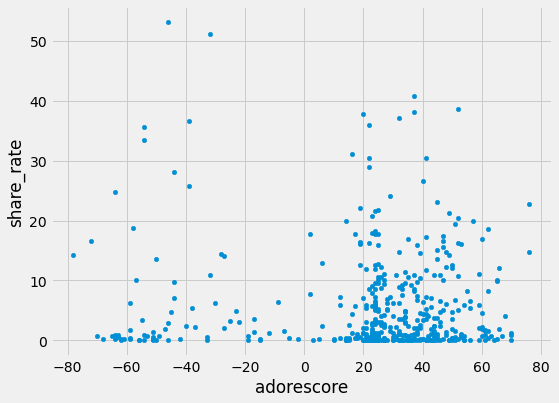

In [6]:
article_sentiment.plot(kind='scatter', x='adorescore', y='share_rate');

At this stage, ranking the overall aggregated score for sentiment (adorescore) against the calculated share rate, there was *some* correlation between the metrics, indicating that articles with a more positive sentiment drove some more shares. However, the correlation wasn;t very strong at this stage.

I opted to zoom in and explore each of the 8 different states of emotion to see if any of them correlated with share rates at all:

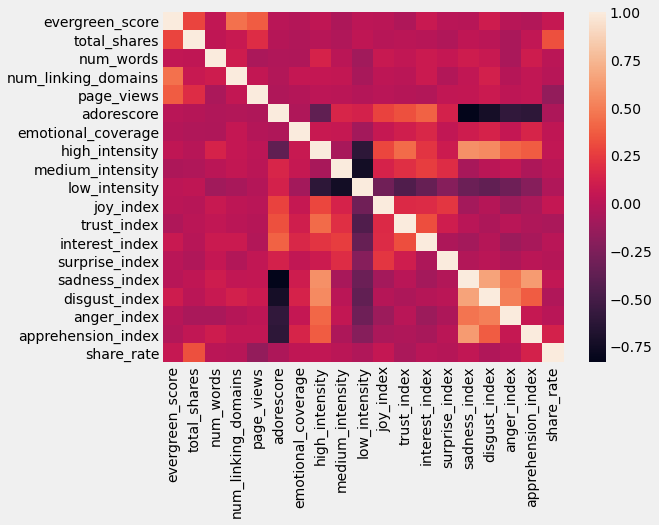

In [7]:
sns.heatmap(article_sentiment.corr());

After cutting the data, visualising it in a few different ways and running some linear regression which returned model accuracy scores of less than 5% (even after scaling the data), it soon became apparent that there were no strong correlations between share rates and any kind of sentiment expressed in an article title (let alone positive sentiment, as I had hypothesised).

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
article_sentiment[['share_rate', 'joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']] = scaler.fit_transform(article_sentiment[['share_rate', 'joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']]);

# Attempting Logisitc Regression
feature_cols = ['joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']

X = article_sentiment[feature_cols]
y = article_sentiment.share_rate

print('Logistic Regression')
lr = LinearRegression()
lr.fit(X, y)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X)

print('Model Accuracy:', lr.score(X, y))

# With train/test split
print('Train/Test Split LR')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('y Intercept:', lr.intercept_)
print('Coefficient', lr.coef_)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Train Model Accuracy:', lr.score(X_train, y_train))
print('Test Model Accuracy:', lr.score(X_test, y_test))

Logistic Regression
y Intercept: -2.2921418367927548e-17
Coefficient [ 0.07906538 -0.07176106  0.02766655 -0.02158536 -0.03603378 -0.12953284
  0.08473259  0.19979204]
Model Accuracy: 0.037222559646968745
Train/Test Split LR
y Intercept: 0.027889181043115756
Coefficient [ 0.07030344 -0.09171392  0.04425418 -0.03062942 -0.05144007 -0.08145947
  0.0825212   0.18379358]
Mean Absolute Error: 0.750414765949591
Mean Squared Error: 0.9840638116233422
Root Mean Squared Error: 0.9919999050520832
Train Model Accuracy: 0.031081563113726007
Test Model Accuracy: 0.03583622276951948


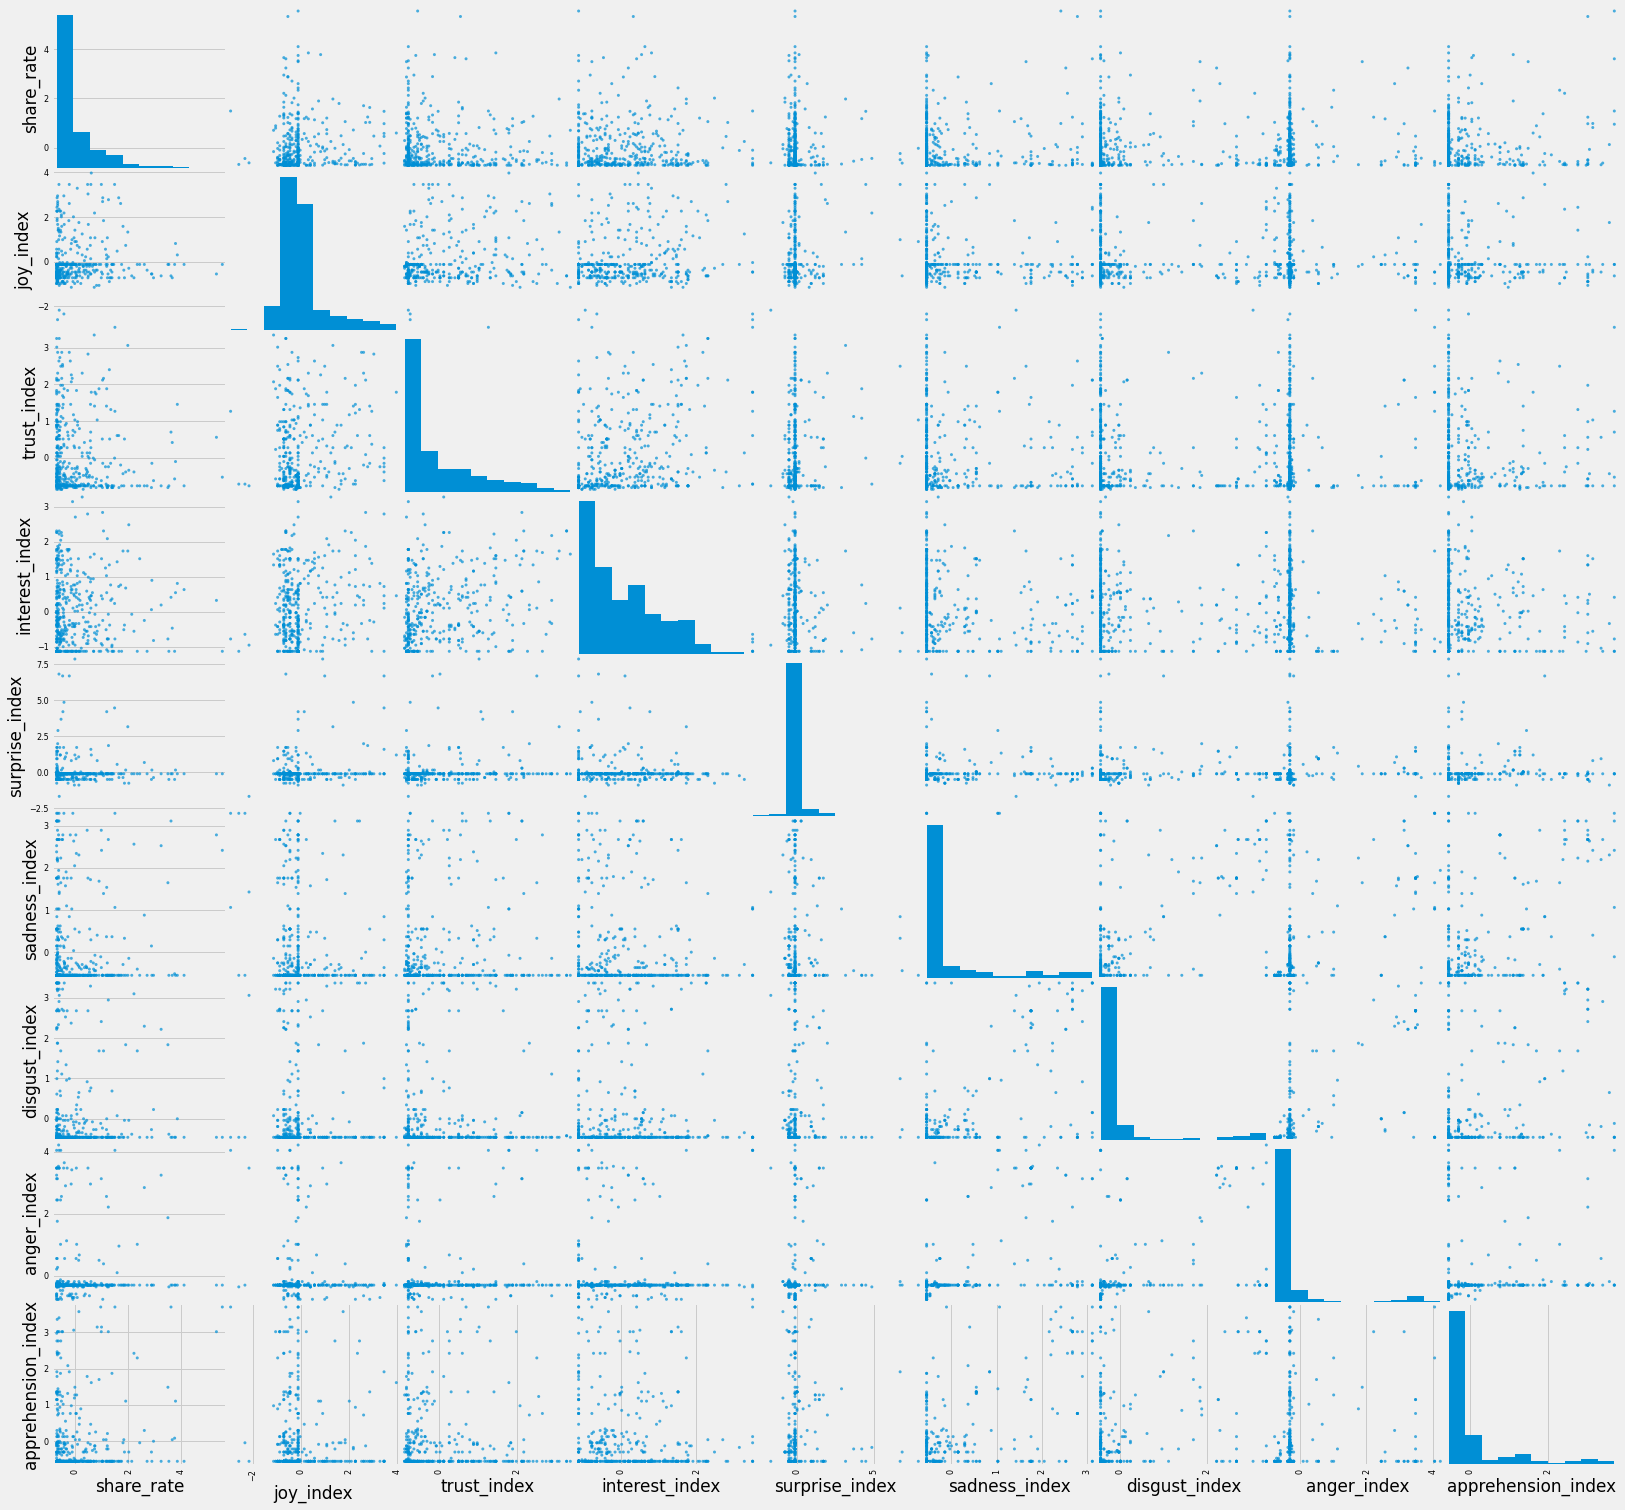

In [9]:
feature_cols = ['joy_index', 'trust_index', 'interest_index', 'surprise_index', 'sadness_index', 'disgust_index', 'anger_index', 'apprehension_index']
pd.plotting.scatter_matrix(article_sentiment[['share_rate'] + feature_cols], figsize=(25, 25), alpha=0.7);

## a. Shortcomings
Shortcomings at this stage were abundant, the most detrimental of which were:
- Too few data points
- Weak correlation between 
- ...

Off the back of this EDA, I started exploring NLP, and extracting keywords based on volume count across rows to identify the heavily used keywords / content topics published over the last 5 years.
## b. Assumptions
From this, I was able to see some trends around high volume keywords and volume of shares. Whilst I wasn't able to validate my original hypothesis around sentiment and shares.

## c. Findings
I started to form a new one around content topics:
###### Articles containing perticular keywords drive higher share rates
Identifying these topics and comparing them to share rates will allow me to understand what topics/keywords the clients are heavily engaged with and therefore make recommendations around the content topics to publish on that will drive higher share rates in comparison to other content topics.

# The Solution
I then built a solution where I created a list of 10 keywords based off keyword volume and industry knowledge, and then calculated the aggregated share rates by keyword, and identified the top content topics to publish articles on.

In [10]:
# PSEUDO CODE:
# Filter high vol. keywords, note the important ones and create a new column to assign keywords to each article
# E.g. Energy = 1, methane = 2, energy = 3 ...
# If any articles have more than one keyword, use the one that appears first in the sentense
# If an article has none, give it a 'not relevant'
# Create a for loop that runs through the new column and aggregates the share rate for each keyword (shars/pageviews)
# Create a new dictionary that lists the keyword with it's share rate
# Recommend key topics to produce more content on based off these findings.

In [11]:
# Identifying the most commonly used words in the article titles
high_freq = pd.Series(' '.join(article_sentiment['title']).lower().split()).value_counts()
high_freq

the           163
a              95
to             78
of             73
energy         61
             ... 
blommaert       1
singapore:      1
contain         1
‘green          1
night           1
Length: 1263, dtype: int64

The keywords I have identified using the above line of code and my industry knowlege include: Algae, Carbon, Climate, Emissions, Energy, Fuel, Future, Innovation, Malaria & Methane.

In [12]:
# Creating a column to identify keywords within an article title.
def identify_keywords(row):
    if 'algae' in row['title']:
        return 'algae'
    
    elif 'carbon' in row['title']:
        return 'carbon'
    
    elif 'climate' in row['title']:
        return 'climate'
    
    elif 'emissions' in row['title']:
        return 'emissions'
    
    elif 'energy' in row['title']:
         return 'energy'
        
    elif 'fuel' in row['title']:
        return 'fuel'
    
    elif 'future' in row['title']:
        return 'future'
    
    elif 'innovation' in row['title']:
        return 'innovation'
    
    elif 'malaria' in row['title']:
        return 'malaria'
    
    elif 'methane' in row['title']:
        return 'methane'
    
    else:
        return 'none'

In [13]:
# Applying the identify_keywords function to the data set within a new column
article_sentiment['keyword'] = article_sentiment.apply(identify_keywords, axis=1)

In [14]:
# Create a new dataframe for the new data
keyword_data = {
    'keyword':['algae','carbon','climate','emissions','energy','fuel','future','innovation','malaria','methane','none'],
    'sum_shares':[0,0,0,0,0,0,0,0,0,0,0],
    'sum_page_views':[0,0,0,0,0,0,0,0,0,0,0]
}

keyword_share_rates = pd.DataFrame(keyword_data)
keyword_share_rates

,keyword,sum_shares,sum_page_views
0,algae,0,0
1,carbon,0,0
2,climate,0,0
3,emissions,0,0
4,energy,0,0
5,fuel,0,0
6,future,0,0
7,innovation,0,0
8,malaria,0,0
9,methane,0,0


In [15]:
# Populate the new dataframe 'keyword_share_rates'

# Populate the 'sum_shares' column
keyword_share_rates.sum_shares[0] = article_sentiment[article_sentiment.keyword.str.contains('algae')].total_shares.sum()
keyword_share_rates.sum_shares[1] = article_sentiment[article_sentiment.keyword.str.contains('carbon')].total_shares.sum()
keyword_share_rates.sum_shares[2] = article_sentiment[article_sentiment.keyword.str.contains('climate')].total_shares.sum()
keyword_share_rates.sum_shares[3] = article_sentiment[article_sentiment.keyword.str.contains('emissions')].total_shares.sum()
keyword_share_rates.sum_shares[4] = article_sentiment[article_sentiment.keyword.str.contains('energy')].total_shares.sum()
keyword_share_rates.sum_shares[5] = article_sentiment[article_sentiment.keyword.str.contains('fuel')].total_shares.sum()
keyword_share_rates.sum_shares[6] = article_sentiment[article_sentiment.keyword.str.contains('future')].total_shares.sum()
keyword_share_rates.sum_shares[7] = article_sentiment[article_sentiment.keyword.str.contains('innovation')].total_shares.sum()
keyword_share_rates.sum_shares[8] = article_sentiment[article_sentiment.keyword.str.contains('malaria')].total_shares.sum()
keyword_share_rates.sum_shares[9] = article_sentiment[article_sentiment.keyword.str.contains('methane')].total_shares.sum()
keyword_share_rates.sum_shares[10] = article_sentiment[article_sentiment.keyword.str.contains('none')].total_shares.sum()

# Populate the 'sum_page_views' column
keyword_share_rates.sum_page_views[0] = article_sentiment[article_sentiment.keyword.str.contains('algae')].page_views.sum()
keyword_share_rates.sum_page_views[1] = article_sentiment[article_sentiment.keyword.str.contains('carbon')].page_views.sum()
keyword_share_rates.sum_page_views[2] = article_sentiment[article_sentiment.keyword.str.contains('climate')].page_views.sum()
keyword_share_rates.sum_page_views[3] = article_sentiment[article_sentiment.keyword.str.contains('emissions')].page_views.sum()
keyword_share_rates.sum_page_views[4] = article_sentiment[article_sentiment.keyword.str.contains('energy')].page_views.sum()
keyword_share_rates.sum_page_views[5] = article_sentiment[article_sentiment.keyword.str.contains('fuel')].page_views.sum()
keyword_share_rates.sum_page_views[6] = article_sentiment[article_sentiment.keyword.str.contains('future')].page_views.sum()
keyword_share_rates.sum_page_views[7] = article_sentiment[article_sentiment.keyword.str.contains('innovation')].page_views.sum()
keyword_share_rates.sum_page_views[8] = article_sentiment[article_sentiment.keyword.str.contains('malaria')].page_views.sum()
keyword_share_rates.sum_page_views[9] = article_sentiment[article_sentiment.keyword.str.contains('methane')].page_views.sum()
keyword_share_rates.sum_page_views[10] = article_sentiment[article_sentiment.keyword.str.contains('none')].page_views.sum()

<ipython-input-15-05e3c89bcb56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_share_rates.sum_shares[0] = article_sentiment[article_sentiment.keyword.str.contains('algae')].total_shares.sum()
<ipython-input-15-05e3c89bcb56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_share_rates.sum_shares[1] = article_sentiment[article_sentiment.keyword.str.contains('carbon')].total_shares.sum()
<ipython-input-15-05e3c89bcb56>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [16]:
# Introducing a new column and calculating share rates
keyword_share_rates['share_rate'] = (keyword_share_rates['sum_shares'] / keyword_share_rates['sum_page_views'])*100

In [17]:
# Describing the dataset to further understand the spread of the data
keyword_share_rates.share_rate.describe()

count    11.000000
mean      3.043746
std       2.549370
min       0.392045
25%       1.373713
50%       2.501304
75%       4.384436
max       8.977604
Name: share_rate, dtype: float64

In [18]:
# Setting the 'keyword' column as the index and listing the share rate (in descending order)
# To get a view on which keywords / content topics drive above average share rates for this data set
keyword_share_rates.set_index('keyword', inplace=True)
keyword_share_rates['share_rate'].sort_values(ascending=False)

keyword
emissions     8.977604
malaria       5.083154
methane       5.020858
innovation    3.748014
none          2.610149
future        2.501304
energy        1.982867
climate       1.602979
fuel          1.144447
carbon        0.417782
algae         0.392045
Name: share_rate, dtype: float64

# The Summary

## a. Findings
Whilst this analyses changed over time - where I started off analysing for correlations between sentiment and shares and found that surprisingly, there are none -  I am still able to provide a solution to the client where I have identified 4 content topics that are liekly to drive shares on site.

## b. Recommendations
Using the average share rate (of 3.04) as a basis, we can see that articles published on the following content topics:
- Emissions
- Malaria
- Methane
- Innovation

are able to drive above average share rates - therefore producing content on these particular topics is likely to drive up share rates.

# Next Steps
Following on from this project, we could A/B test articles, publishing content that includes these keywords in their titles on site, and publishing articles that don't - and review results to validate this analysis.

Other analyses we may be able to perform in investigation to meet the clients need states (and drive up shares) incude:

## a. Audience Preference
I could investigate Audience segmentation using clustering to find patterns in audience behavious on the clients website. 
This analyses would investigate trends in how audiences engage with different types of content, and allow for a model that is able to identify how certain audiences would engage with new content and provide insights around whether this would be beneficial to the client.

## b. Impact of Paid Media on Content Performance
In the industr, there is an assumption that paid audiences are not engaged engagaed with content, as they are served ads and in some cases accidentalyl click and are brought to an article, or have no interest in content even if they have willingly clicked on the ad. This results in poor engagement from paid audiences overall.
I'd like to investigate if this is this true, and if not, does this audience have a preference around content - what can we do to get the most of this "unengaged" audience?